In [208]:
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import numpy as np
import string
from gensim import corpora
import gensim
from nltk.corpus import words
from gensim.models import LdaModel, LsiModel, Word2Vec
from gensim.corpora import Dictionary
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import PCA

In [8]:
# stop words
from spacy.lang.en import STOP_WORDS
stop_wrd = []
with open('stopword.txt') as f:
    for c in f:
        c = c.replace(",","").replace("\n","").replace('"',"").strip()
        stop_wrd.append(c)
stop = list(STOP_WORDS)


In [4]:
############### verified_negativecomment #############

In [6]:
doc_complete = []
with open('verified_negativecomment.txt') as f:
    for l in f:
        doc_complete.append(l)   

In [9]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]


In [ ]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20)

/home/ubuntu/.virtualenvs/nlp/local/lib/python2.7/site-packages/gensim/models/ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [161]:
print(ldamodel.print_topics(num_topics=20))

[(179, u'0.488*"india" + 0.105*"pakistan" + 0.075*"indian" + 0.054*"country" + 0.020*"speak" + 0.018*"mother" + 0.015*"bangladesh" + 0.011*"people" + 0.010*"afghanistan" + 0.009*"time"'), (6, u'0.210*"kill" + 0.044*"release" + 0.038*"labor" + 0.037*"people" + 0.035*"enjoy" + 0.032*"powerful" + 0.031*"backward" + 0.027*"sunni" + 0.022*"tool" + 0.021*"vested"'), (165, u'0.216*"china" + 0.091*"chinese" + 0.087*"japan" + 0.069*"pak" + 0.036*"trade" + 0.027*"develop" + 0.022*"purchase" + 0.020*"obvious" + 0.020*"coward" + 0.020*"stick"'), (102, u'0.414*"easier" + 0.043*"medical" + 0.036*"add" + 0.033*"payer" + 0.033*"theyre" + 0.030*"catch" + 0.028*"earned" + 0.020*"stuck" + 0.018*"begin" + 0.015*"ride"'), (71, u'0.133*"blind" + 0.098*"eye" + 0.064*"mouth" + 0.050*"shut" + 0.050*"decide" + 0.046*"keeping" + 0.028*"policeman" + 0.028*"leadership" + 0.027*"people" + 0.022*"khangress"'), (78, u'0.309*"case" + 0.183*"court" + 0.042*"supreme" + 0.028*"raje" + 0.020*"justice" + 0.018*"kick" + 0.0

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

In [163]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=200)  # train model

In [164]:
K = 20
columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
#print model.num_topics
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}

for x in range (10):
  data = pd.DataFrame({columns[0]:"",
                     columns[1]:"",
                     columns[2]:"",
                     columns[3]:"",
                     columns[4]:"",
                       columns[5]:"",
                       columns[6]:"",
                       columns[7]:"",
                       columns[8]:"",
                       columns[9]:"",
                       columns[10]:"",
                       columns[11]:"",
                       columns[12]:"",
                       columns[13]:"",
                       columns[14]:"",
                       columns[15]:"",
                       columns[16]:"",
                       columns[17]:"",
                       columns[18]:"",
                       columns[19]:"",
                    },index=[0])
  df=df.append(data,ignore_index=True)  
    
for line in model.print_topics(num_topics=K):
    tp, w = line
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

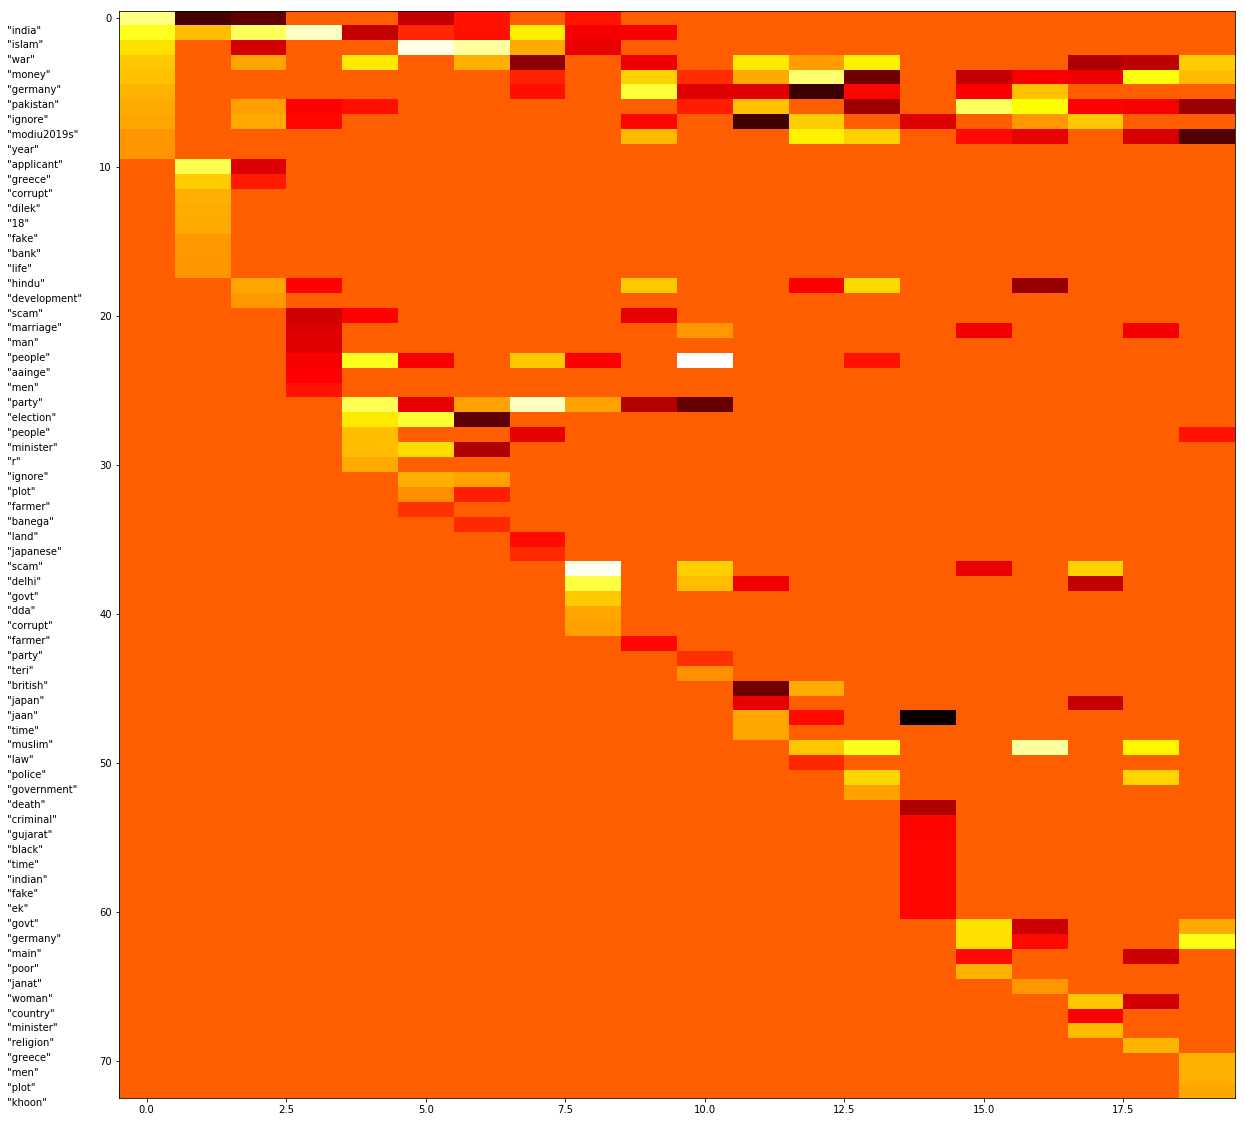

In [165]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (20,20))
plt.imshow(zz, cmap='hot', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.show()

In [167]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(20))
X.shape

(20, 1995)

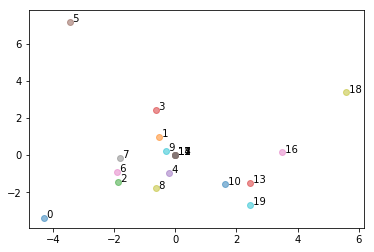

In [168]:
pca = PCA(n_components=2)
X_pca = pca.fit(X.toarray()).transform(X.toarray())
for i in xrange(X_pca.shape[0]):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
plt.show()

In [199]:
# X_pca = pca.fit(X.T.toarray()).transform(X.T.toarray())
# plt.figure(figsize=(20,20)) 
# for i, n in enumerate(vec.get_feature_names()):
#     plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#     plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + n, fontsize=8)
# plt.show()

/home/ubuntu/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


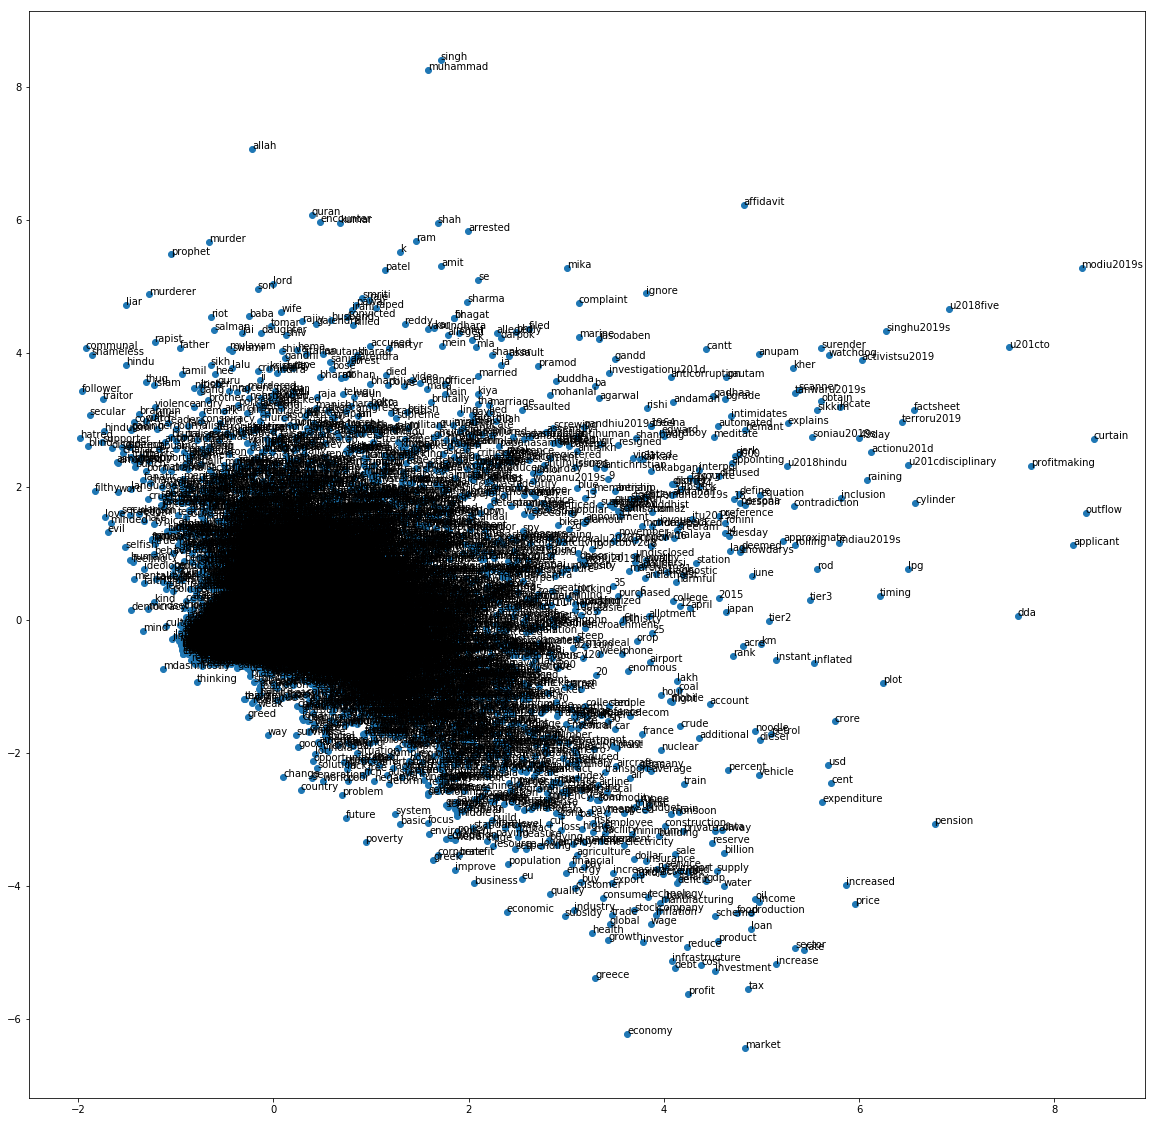

In [207]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.figure(figsize = (20,20))
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()